<a href="https://colab.research.google.com/github/jovianparco/Numerical-Methods/blob/main/58015_CurveFitting_San.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CURVE FITTING:

###Importing Libraries


In [26]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

###Loading Dataset


In [27]:
diabetes_df = datasets.load_diabetes()

###Describing Dataset


In [28]:
diabetes = pd.DataFrame(diabetes_df.data, columns=diabetes_df.feature_names)
diabetes_target = pd.Series(diabetes_df.target)
print(diabetes_df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

###Data Triming

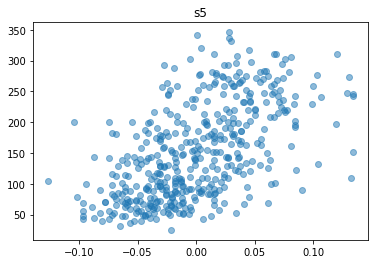

In [29]:
plt.scatter(x=diabetes["s5"], y=diabetes_target, alpha=0.5)
plt.title("s5") 
plt.show()

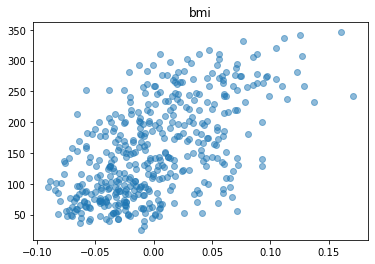

In [30]:
plt.scatter(x=diabetes["bmi"], y=diabetes_target, alpha=0.5)
plt.title("bmi") 
plt.show()

The researchers used the  s5(serum triglycerides level) and BMI as the independent, while the target value is disease progression one year after baseline.


In [31]:
X = pd.DataFrame(np.c_[diabetes['s5'], diabetes["bmi"]], columns=['s5','bmi'])
y = diabetes_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

### Multiple Linear Regression

In [32]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
model_summary = pd.DataFrame(X.columns, columns=['Features'])
model_summary['Weights Raw'] = model.coef_.reshape(2,1)
model_summary = model_summary.append({'Features':'Intercept', 'Weights Raw':float(model.intercept_)}, ignore_index=True)
model_summary

,Features,Weights Raw
0,s5,604.623611
1,bmi,696.729783
2,Intercept,151.728781


In [34]:
preds = model.predict(X_test)
out = pd.DataFrame({'Actual': y_test, 'Predicted': preds})

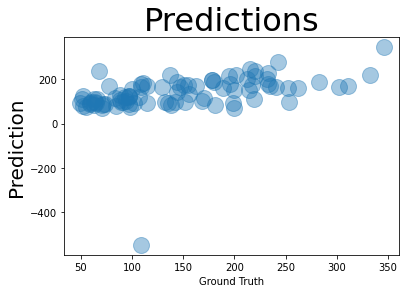

In [53]:
plt.figure()
plt.title('Predictions', fontsize=32)

plt.scatter(y_test, preds, s = 256,  alpha=0.4)
plt.xlabel('Ground Truth')
plt.ylabel('Prediction', fontsize=20)

plt.show()

In [36]:
MSE = metrics.mean_squared_error(y_test, preds)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, preds)
AR2 = 1-(1-R2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
model_metrics = pd.DataFrame([['MSE'],['RMSE'],['R^2'],['ADJR^2']], 
                             columns=['Metrics'])
model_metrics['Multiple Linear Regression'] = MSE, RMSE, R2, AR2
model_metrics

,Metrics,Multiple Linear Regression
0,MSE,3254.088753
1,RMSE,57.044621
2,R^2,0.389359
3,ADJR^2,0.385869


### Normal Equation

In [37]:
X_trn = np.c_[np.ones((len(X_train),1)),X_train]
pseudoinv = np.linalg.inv(X_trn.T @ X_trn)
theta = pseudoinv @ X_trn.T @ y_train
X_new_trn = np.c_[np.ones((len(X_test),1)),X_test]
pred = X_new_trn @ theta

In [38]:
MSE = metrics.mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, pred)
AR2 = 1-(1-R2)*(X_trn.shape[0]-1)/(X_trn.shape[0]-X_trn.shape[1]-1)
model_metrics = pd.DataFrame([['MSE'],['RMSE'],['R^2'],['ADJR^2']], 
                             columns=['Metrics'])
model_metrics['Multiple Linear Regression'] = MSE, RMSE, R2, AR2
model_metrics

,Metrics,Multiple Linear Regression
0,MSE,3254.088753
1,RMSE,57.044621
2,R^2,0.389359
3,ADJR^2,0.384110


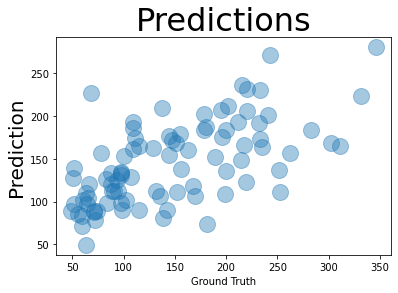

In [52]:
plt.figure()
plt.title('Predictions', fontsize=32)

plt.scatter(y_test, pred, s = 256,  alpha=0.4)
plt.xlabel('Ground Truth')
plt.ylabel('Prediction', fontsize=20)

plt.show()

###Polynomial Regression (Perfect fit)

The researcher determines the perfect fit in Polynomial Regression by testing the degree of complexity, which is the 3-degree polynomial, because the variance is close to the predicted values and the graph shown below.

In [40]:
quad_features= PolynomialFeatures(degree=3)  # DEGREE = 2 AND 3 
x_quad = quad_features.fit_transform(X_train)

In [41]:
model = LinearRegression()
model.fit(x_quad, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
preds = model.predict(quad_features.fit_transform(X_test))

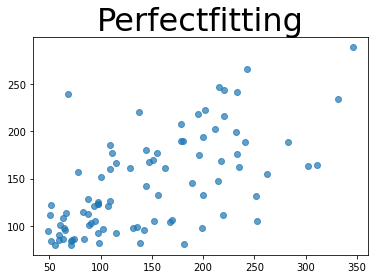

,Metrics,Polynomial Regression (Quad)
0,MSE,3215.063572
1,RMSE,56.701531
2,R^2,0.396682
3,ADJR^2,0.393234


In [43]:
poly_MSE = metrics.mean_squared_error(y_test, preds)
poly_RMSE = np.sqrt(poly_MSE)
poly_R2 = metrics.r2_score(y_test, preds)
poly_AR2 = 1-(1-poly_R2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
model_metrics = pd.DataFrame([['MSE'],['RMSE'],['R^2'],['ADJR^2']], 
                             columns=['Metrics'])
model_metrics['Polynomial Regression (Quad)'] = poly_MSE, poly_RMSE, poly_R2, poly_AR2
plt.figure()
plt.title('Perfectfitting', fontsize=32)
plt.scatter(y_test, preds,alpha=0.7)
plt.show()
model_metrics

####Polynomial Regression (Under fit)

The researcher determines the underfiyting in Polynomial Regression by testing the degree of complexity, which is the >=1 degree polynomial because variance to the predicted values is getting further, unlike degree 2 or 3, the causes of underfitting is oversimplifying the problem, which in this case is the polynomial degree.

In [44]:
quad_features= PolynomialFeatures(degree=1)  # DEGREE =>1
x_quad = quad_features.fit_transform(X_train)

In [45]:
model = LinearRegression()
model.fit(x_quad, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
preds = model.predict(quad_features.fit_transform(X_test))

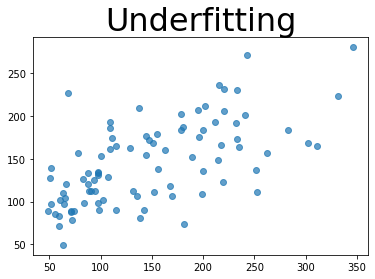

,Metrics,Polynomial Regression (Quad)
0,MSE,3254.088753
1,RMSE,57.044621
2,R^2,0.389359
3,ADJR^2,0.385869


In [47]:
poly_MSE = metrics.mean_squared_error(y_test, preds)
poly_RMSE = np.sqrt(poly_MSE)
poly_R2 = metrics.r2_score(y_test, preds)
poly_AR2 = 1-(1-poly_R2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
model_metrics = pd.DataFrame([['MSE'],['RMSE'],['R^2'],['ADJR^2']], 
                             columns=['Metrics'])
model_metrics['Polynomial Regression (Quad)'] = poly_MSE, poly_RMSE, poly_R2, poly_AR2
plt.figure()
plt.title('Underfitting', fontsize=32)
plt.scatter(y_test, preds,alpha=0.7)
plt.show()
model_metrics

####Polynomial Regression (Over fit)

The researcher determines the overfitting in Polynomial Regression by testing the degree of complexity, which is the <= 4-degree polynomial because variance to the predicted values is getting further, unlike degree 2 or 3, the causes of overfitting is overcomplicating the problem, which in this case is the polynomial degree, because of that minor errors or difference in the data is counted causing significant changes in the predictions.

In [48]:
quad_features= PolynomialFeatures(degree=6)  # DEGREE 4=<
x_quad = quad_features.fit_transform(X_train)

In [49]:
model = LinearRegression()
model.fit(x_quad, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
preds = model.predict(quad_features.fit_transform(X_test))

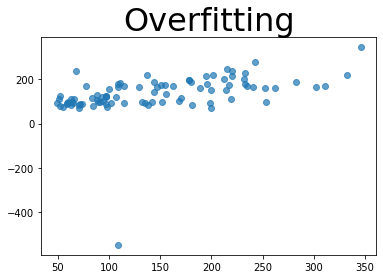

,Metrics,Polynomial Regression (Quad)
0,MSE,8188.260852
1,RMSE,90.489010
2,R^2,-0.536556
3,ADJR^2,-0.545336


In [51]:
poly_MSE = metrics.mean_squared_error(y_test, preds)
poly_RMSE = np.sqrt(poly_MSE)
poly_R2 = metrics.r2_score(y_test, preds)
poly_AR2 = 1-(1-poly_R2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
model_metrics = pd.DataFrame([['MSE'],['RMSE'],['R^2'],['ADJR^2']], 
                             columns=['Metrics'])
model_metrics['Polynomial Regression (Quad)'] = poly_MSE, poly_RMSE, poly_R2, poly_AR2
plt.figure()
plt.title('Overfitting', fontsize=32)
plt.scatter(y_test, preds,alpha=0.7)
plt.show()
model_metrics 

###REFERENCE:

<br>[1] Simplilearn, “Overfitting and UNDERFITTING machine Learning | machine learning tutorial for Beginners |Simplilearn,” 11-Sep-2020. [Online]. Available: https://www.youtube.com/watch?v=W-0-u6XVbE4. [Accessed: 01-May-2021]
<Br>[2] D. Lopez, “Linear Regression,” in Numerical Methods, 2021. 
<Br>[3] Scikit-Learn, “scikit-learn/scikit-learn,” GitHub. [Online]. Available: https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/descr/diabetes.rst. [Accessed: 01-May-2021]. 
<Br>[4] Scikit-Learn, “Normal Equation code in python | AI Basics |,” 27-Aug-2020. [Online]. Available: https://www.youtube.com/watch?v=bVNe5cl5K54. [Accessed: 03-May-2021]. 